# Определение перспективного тарифа для телеком компании "Мегалайн"

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Цель проекта:
Сделать предварительный анализ тарифов на  выборке клиентов из 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Открыть файлы данных и изучить информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_calls = pd.read_csv('/datasets/calls.csv')
df_calls.info()
df_calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [2]:
df_internet = pd.read_csv('/datasets/internet.csv')
df_internet.info()
df_internet.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [3]:
df_messages = pd.read_csv('/datasets/messages.csv')
df_messages.info()
df_messages.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [4]:
df_users = pd.read_csv('/datasets/users.csv')
df_users.info()
df_users.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [5]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_tariffs.info()
df_tariffs.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Вывод
1. В датафрейме с информацией о звонках столбец с датой звонка имет неверный тип данных - строчный. Также столбец с длительностью звонка стоит откргулить по верхней границе до целых чисел.
2. В датафрейме с информацией об интернет трафике есть ненужный столбец 'unnamed 0', повторяющий индексы. Аналогично - неверный тип данныху столбца со временем.
3. В датафрейме с информацией о сообщениях у даты неверный тип данных.
4. В датафрейме с информацией о пользователях имеются пропуски в дате прекращения пользования тарифом, связано с тем, что на момент извлечения данных клиент продолжал пользоваться тарифом. У даты регистрации тоже неверный формат данных.

## Подготовка данных

### Замена типов данных, обнаружение ошибок, проверка дубликатов.

Преобразуем столбцы с датой в датафреймах к нужному формату.

In [6]:
# переводим столбец 'call_date' в df_calls к нужному формату:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

# округляем столбец 'duratation' в df_calls в большую сторону методом ceil() и переводим в целочисленные
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls['duration'] = df_calls['duration'].astype('int64')

#cоздадим столбец с месяцом
df_calls['month'] = df_calls['call_date'].dt.month


# проверяем
df_calls.info()
df_calls.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null int64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


In [7]:
# проверяем на наличие дубликатов
df_calls.duplicated().sum()

0

In [8]:
#удаляем столбец 'Unnamed: 0' из df_internet
df_internet = df_internet.drop('Unnamed: 0', axis=1)

# переводим столбец 'session_date' в df_internet к нужному формату:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

# округляем столбец 'mb_used' в df_internet в большую сторону методом ceil() и переводим в целочисленные
df_internet['mb_used'] = np.ceil(df_internet['mb_used'])
df_internet['mb_used'] = df_internet['mb_used'].astype('int64')

#cоздадим столбец с месяцом
df_internet['month'] = df_internet['session_date'].dt.month


# проверяем
df_internet.info()
df_internet.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


,id,mb_used,session_date,user_id,month
0,1000_0,113,2018-11-25,1000,11
1,1000_1,1053,2018-09-07,1000,9
2,1000_2,1198,2018-06-25,1000,6
3,1000_3,551,2018-08-22,1000,8
4,1000_4,303,2018-09-24,1000,9
5,1000_5,400,2018-10-02,1000,10
6,1000_6,541,2018-09-07,1000,9
7,1000_7,416,2018-07-11,1000,7
8,1000_8,506,2018-10-08,1000,10
9,1000_9,346,2018-09-03,1000,9


In [9]:
# проверяем на наличие дубликатов
df_internet.duplicated().sum()

0

In [10]:
# переводим столбец 'message_date' в df_messages к нужному формату:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

#cоздадим столбец с месяцом
df_messages['month'] = df_messages['message_date'].dt.month

# проверяем
df_messages.info()
df_messages.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [11]:
# проверяем на наличие дубликатов
df_messages.duplicated().sum()

0

In [12]:
# переводим столбцы 'churn_date' и 'reg_date' в df_users к нужному формату:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

# проверяем
df_users.info()
df_users.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


In [13]:
# проверяем на наличие дубликатов
df_users.duplicated().sum()

0

#### Вывод

1. Выполнена замена типов данных в столбцах с датами на из строкового формата в формат дат для всех датафреймов.
2. Выполнено округление длительности звонков в большую сторону с учетом особенности, что разговор в 1 секунду округляется до минуты, и преобразовано в целочисленные значения.
3. Удален непонятный столбец из данных по интернет трафику.

Обнаружены звонки длительностью 0 минут. Принято оставить эти звонки в датафрейме и посмотреть как они повлияют на анализ в дальнейшем.

Обнаружено что из 500 пользователей 38 перестали пользоваться тарифами "Мегалайна" на момент выгрузки данных. Что составляет 7.6%.

### Подготовка основной таблицы. Расчёт прибыли.

Выполним пошаговое объединение датафреймов для создания основой таблицы с необходимыми данными.

Первым шагом будет объединение таблиц с данными пользователей и данными тарифов.

In [14]:
# для объединения датафреймов df_users, df_tariffs по названию тарифа 
# переименуем столбец 'tariffs_name' на 'tariffs'в датафрейме df_tariffs

df_tariffs = df_tariffs.rename(columns={df_tariffs.columns[7]:'tariff'})

In [15]:
# объединим таблицы df_users, df_tariffs по столбцу 'tariff'
df_users_full = df_users.merge(df_tariffs, on='tariff', how='left')

# таблицу с названием тарифа
df_tariff_name = df_users_full[['user_id','tariff']]
df_tariff_name.head(10)

,user_id,tariff
0,1000,ultra
1,1001,smart
2,1002,smart
3,1003,ultra
4,1004,ultra
5,1005,smart
6,1006,smart
7,1007,smart
8,1008,smart
9,1009,smart


Теперь для каждого пользователя отображается выбранный тариф.
Далее выполним объединение датафреймов по звонкам, сообщениям и трафику интернета и с тарифом.

In [16]:
# cначала сгруппируем таблицы по звонкам, сообщению и трафику интернета по месяцу и пользователю.

user_calls = df_calls.groupby(['user_id','month'])\
                     .agg({'duration':'sum','id':'count'})\
                     .reset_index()\
                     .rename(columns={'durtaion':'total_duration','id':'count_calls'})

user_messages = df_messages.groupby(['user_id','month'])\
                     .agg({'id':'count'})\
                     .reset_index()\
                     .rename(columns={'id':'count_messages'})

user_internet = df_internet.groupby(['user_id','month'])\
                     .agg({'mb_used':'sum'})\
                     .reset_index()\
                     .rename(columns={'mb_used':'total_mb_used'})

#объединим таблицы поэтапно

user_calls_and_messages = user_calls.merge(user_messages, on=['user_id','month'], how='outer')

user_calls_and_messages_and_internet = user_calls_and_messages.merge(user_internet, on=['user_id','month'], how='outer')

user_total = user_calls_and_messages_and_internet.merge(df_tariff_name, on=['user_id'], how='left')

user_total

,user_id,month,duration,count_calls,count_messages,total_mb_used,tariff
0,1000,5,159.0,22.0,22.0,2256.0,ultra
1,1000,6,172.0,43.0,60.0,23257.0,ultra
2,1000,7,340.0,47.0,75.0,14016.0,ultra
3,1000,8,408.0,52.0,81.0,14070.0,ultra
4,1000,9,466.0,58.0,57.0,14581.0,ultra
...,...,...,...,...,...,...,...
3209,1489,9,NaN,NaN,32.0,17232.0,smart
3210,1489,10,NaN,NaN,21.0,19588.0,smart
3211,1489,11,NaN,NaN,20.0,17516.0,smart
3212,1489,12,NaN,NaN,35.0,17341.0,smart


В столбах по сообщениям и по звонкам имеются пропуски. Посмотриб подбробнее.

In [17]:
user_total.isna().sum()

user_id             0
month               0
duration           40
count_calls        40
count_messages    497
total_mb_used      11
tariff              0
dtype: int64

Скорее всего это те месяцы, когда пользователь не пользовался звонками, сообщениями или интернет трафиком. Приравняем эти пропуски к 0.

In [18]:
#приравниаем пропуски к 0
user_total = user_total.fillna(0)

# количество звонков и сообщений переводим в целочисленный формат
user_total[['count_calls','count_messages']] = user_total[['count_calls','count_messages']].astype('int64')

# проверяем замену пропусков

display (user_total.isna().sum())
user_total.head(10)

user_id           0
month             0
duration          0
count_calls       0
count_messages    0
total_mb_used     0
tariff            0
dtype: int64

,user_id,month,duration,count_calls,count_messages,total_mb_used,tariff
0,1000,5,159.0,22,22,2256.0,ultra
1,1000,6,172.0,43,60,23257.0,ultra
2,1000,7,340.0,47,75,14016.0,ultra
3,1000,8,408.0,52,81,14070.0,ultra
4,1000,9,466.0,58,57,14581.0,ultra
5,1000,10,350.0,57,73,14717.0,ultra
6,1000,11,338.0,43,58,14768.0,ultra
7,1000,12,333.0,46,70,9827.0,ultra
8,1001,11,430.0,59,0,18452.0,smart
9,1001,12,414.0,63,0,14053.0,smart


#### Вывод

Получили таблицу, в которой для каждого пользователя в каждом месяце рассчитана длительность звонков, количество звонков, количество сообщений, использованный интенрет-трафик и тариф пользователя.

Далее произведем расчёт помесячной выручки с каждого пользователя.

### Определение помесячной выручки с каждого пользователя.

Напишем функцию для расчёта помесячной выручки для каждого клиента.

In [19]:
#функция для расчёта ежемесячной выручки с клиентов
# выбирает клиентов с тарифом смарт, считает, считает разницу между использованным количеством минут, сообщений и интернет трафика
# в случае отрицательной разнцы, то есть превышения отсутвует, и сверх тарифа минуты и т.д. = 0
# cкладывает сумму всех экстра услуг + стоимость тарифа и сохраняет результат в столбец с выручкой

def monthly_revenue(row):
    messages= row['count_messages']
    duration = row['duration']
    calls= row['count_calls']
    mb_used= row['total_mb_used']
    tariff= row['tariff']
    
    if tariff == 'smart':
        extra_duration = duration - df_tariffs.loc[0, 'minutes_included']
        extra_mb = mb_used - df_tariffs.loc[0, 'mb_per_month_included']
        extra_messages = messages - df_tariffs.loc[0, 'messages_included']
        
        if extra_messages < 0: extra_messages = 0
        if extra_duration < 0: extra_duration = 0
        if extra_mb <= 0: extra_mb = 0
        for n in range(1,21):
            if 1024*(n-1) < extra_mb <= 1024*n:
                extra_mb = 1024*n
                break
        
        
        return (df_tariffs.loc[0,'rub_per_minute'] * extra_duration + 
                (df_tariffs.loc[0,'rub_per_gb'] / 1024) * extra_mb +
                df_tariffs.loc[0,'rub_per_message'] * extra_messages +
                df_tariffs.loc[0,'rub_monthly_fee'])
    else:
        extra_duration = duration - df_tariffs.loc[1, 'minutes_included']
        extra_mb = mb_used - df_tariffs.loc[1, 'mb_per_month_included']
        extra_messages = messages - df_tariffs.loc[1, 'messages_included']
                
        if extra_messages < 0: extra_messages = 0
        if extra_duration < 0: extra_duration = 0 
        if extra_mb <= 0: extra_mb = 0
        for n in range(1,21):
            if 1024*(n-1) < extra_mb <= 1024*n:
                extra_mb = 1024*n
                break
            
        return (df_tariffs.loc[1,'rub_per_minute'] * extra_duration + 
                (df_tariffs.loc[1,'rub_per_gb'] / 1024) * extra_mb +
                df_tariffs.loc[1,'rub_per_message'] * extra_messages +
                df_tariffs.loc[1,'rub_monthly_fee'])

user_total['revenue'] = user_total.apply(monthly_revenue, axis=1)   

user_total['revenue'] = user_total['revenue'].round(decimals=2)

user_total

,user_id,month,duration,count_calls,count_messages,total_mb_used,tariff,revenue
0,1000,5,159.0,22,22,2256.0,ultra,1950.0
1,1000,6,172.0,43,60,23257.0,ultra,1950.0
2,1000,7,340.0,47,75,14016.0,ultra,1950.0
3,1000,8,408.0,52,81,14070.0,ultra,1950.0
4,1000,9,466.0,58,57,14581.0,ultra,1950.0
...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0,32,17232.0,smart,950.0
3210,1489,10,0.0,0,21,19588.0,smart,1550.0
3211,1489,11,0.0,0,20,17516.0,smart,1150.0
3212,1489,12,0.0,0,35,17341.0,smart,950.0


#### Вывод

Создана функция для расчёта ежемесячной выручки для каждого пользователя. Результаты выручки за каждой месяц добавлены в новый столбец.

## Анализ данных

### Cоотношение тарифов

Посмотрим какое количество клиентов каким тарифом пользуется.

Text(0.02, -0.5, 'Количество клиентов с тарифом "Ультра": 29.8%')

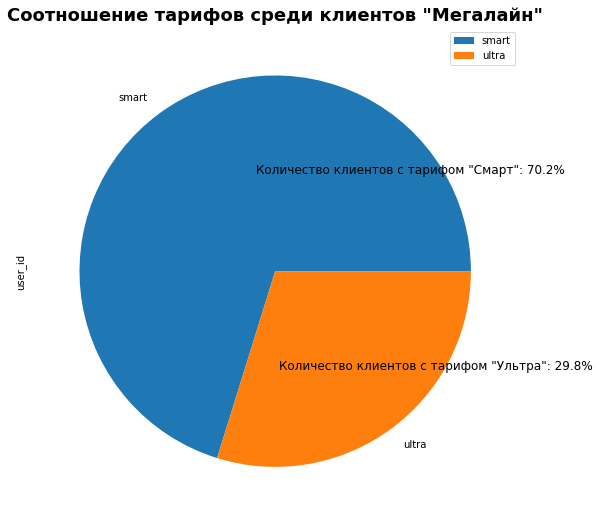

In [20]:
# посчитаем процентное соотношение тарифов между клиентами.
smart_percent = df_users['user_id'][df_users['tariff'] == 'smart'].count() / df_users['user_id'].count()
ultra_percnet = df_users['user_id'][df_users['tariff'] == 'ultra'].count() / df_users['user_id'].count()

# текстовые сообщения
smart_perncent_text = 'Количество клиентов с тарифом "Смарт": {:.1%}'.format(smart_percent)
ultra_percnet_text = 'Количество клиентов с тарифом "Ультра": {:.1%}'.format(ultra_percnet)

#строим круговую диааграмму
df_users.pivot_table(index='tariff', values='user_id', aggfunc='count').plot(y='user_id', kind='pie', figsize =(15, 9))
plt.title('Соотношение тарифов среди клиентов "Мегалайн"', fontsize = 18, fontweight = 'bold')
plt.text(-0.1, 0.5, smart_perncent_text, fontsize=12)
plt.text(0.02, -0.5, ultra_percnet_text, fontsize=12)

#### Вывод

70% против 30% весомый перевес в сторону более доступного тарифа.


### Количество минут разговора. Среднее, стандратное отклонение, дисперсия.


Определим среднее количество минут, дисперсию и стандартное отклонение для каждого месяца для пользователей тарима "Смарт" и "Ультра".

In [21]:
#разделим наших пользователей по тарифам
smart_users = user_total.query('tariff == "smart"')
ultra_users = user_total.query('tariff == "ultra"')

#подготовим сводные таблицы по количеству минут и рассчитаем среднее, стандартное отклонение и дисперсию.
smart_pivot_duration = smart_users.pivot_table(index='month', values='duration', aggfunc=['mean','std','var'])
ultra_pivot_duration = ultra_users.pivot_table(index='month', values='duration', aggfunc=['mean','std','var'])

In [22]:
display(smart_pivot_duration.round(decimals=1))
display(ultra_pivot_duration.round(decimals=1))

,mean,std,var
,duration,duration,duration
month,,,
1,203.9,154.2,23787.3
2,298.7,190.8,36412.3
3,390.1,191.9,36823.2
4,367.1,186.5,34778.2
5,387.4,186.6,34820.1
6,395.6,175.3,30742.9
7,408.4,179.6,32250.3
8,421.5,186.5,34793.6


,mean,std,var
,duration,duration,duration
month,,,
1,428.1,269.8,72769.4
2,297.1,296.5,87919.7
3,489.6,333.7,111384.9
4,458.0,267.7,71653.9
5,510.3,289.6,83870.2
6,479.7,302.5,91535.9
7,545.8,307.1,94322.3
8,510.8,313.0,97956.5


В таблицах представлены результаты среднего количества минут, стандратного отклонения и дисперсии по месяцам для клиентов тарифом "Смарт" и "Ультра".
Построим график среднего количества минут разговора по месяцам для 2 тарифов.

In [23]:
smart_plot_duration = smart_users.pivot_table(index='month', values='duration', aggfunc='mean')
ultra_plot_duration = ultra_users.pivot_table(index='month', values='duration', aggfunc='mean')

(0, 13)

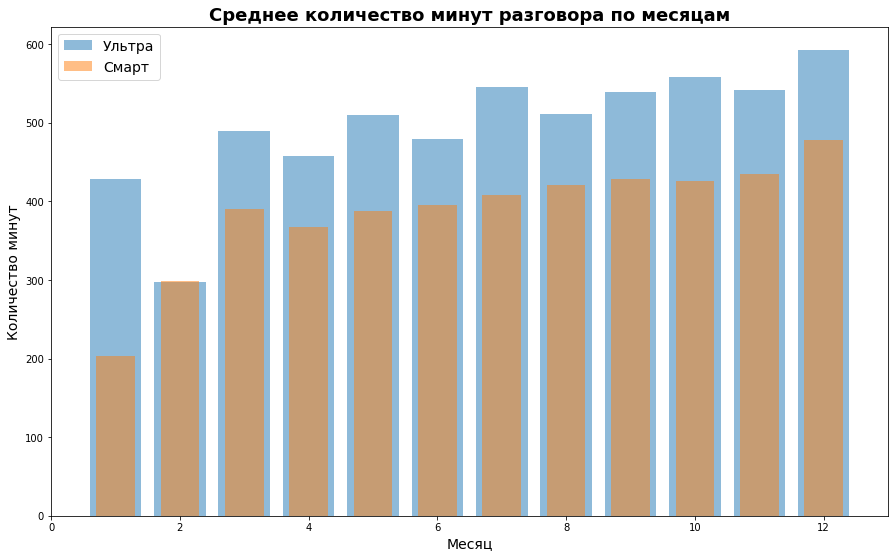

In [24]:
plt.figure(figsize=(15,9))
plt.bar(ultra_plot_duration.index, ultra_plot_duration['duration'], alpha = 0.5, label='Ультра', width=0.8)
plt.bar(smart_plot_duration.index, smart_plot_duration['duration'], alpha = 0.5, label='Смарт', width=0.6)

plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Месяц', fontsize = 14)
plt.ylabel('Количество минут', fontsize = 14)
plt.title('Среднее количество минут разговора по месяцам', fontsize = 18, fontweight = 'bold')
plt.xlim(0,13)


#### Вывод

На графика наблюдается рост среднего значения минут разговора для обоих тарифов к концу года. 

Так же стоит отметить, что среднее количество минут у клиентов тарифа "Смарт" граничит с пределом бесплатных 500 минут тарифа. А у клиентов тарифа "Ультра" количество использованных минут хоть и выше, но до 1500 минут в среднем в месяц они практически не выговаривают.

### Количество сообщений. Среднее, стандратное отклонение, дисперсия.

Определим среднее количество сообщений, дисперсию и стандартное отклонение для каждого месяца для пользователей тарима "Смарт" и "Ультра".

In [25]:
#подготовим сводные таблицы по количеству cообщений и рассчитаем среднее, стандартное отклонение и дисперсию.
smart_pivot_messages = smart_users.pivot_table(index='month', values='count_messages', aggfunc=['mean','std','var'])
ultra_pivot_messages = ultra_users.pivot_table(index='month', values='count_messages', aggfunc=['mean','std','var'])

display(smart_pivot_messages.round(decimals=1))
display(ultra_pivot_messages.round(decimals=1))

,mean,std,var
,count_messages,count_messages,count_messages
month,,,
1,18.2,16.2,262.4
2,24.1,21.8,473.1
3,31.9,26.8,718.5
4,30.7,24.5,602.1
5,33.8,27.0,731.0
6,33.4,28.4,806.8
7,33.8,28.3,799.9
8,33.6,29.0,838.3


,mean,std,var
,count_messages,count_messages,count_messages
month,,,
1,33.8,30.7,940.7
2,22.0,26.8,716.8
3,32.3,41.6,1732.4
4,31.6,37.5,1407.3
5,37.9,40.3,1624.6
6,41.7,44.6,1986.3
7,49.8,48.7,2372.0
8,48.4,46.6,2171.7


В таблицах представлены результаты среднего количества сообщений, стандратного отклонения и дисперсии по месяцам для клиентов тарифом "Смарт" и "Ультра".
Построим график среднего количества сообщений по месяцам для 2 тарифов.

In [26]:
smart_plot_messages = smart_users.pivot_table(index='month', values='count_messages', aggfunc='mean')
ultra_plot_messages = ultra_users.pivot_table(index='month', values='count_messages', aggfunc='mean')

(0, 13)

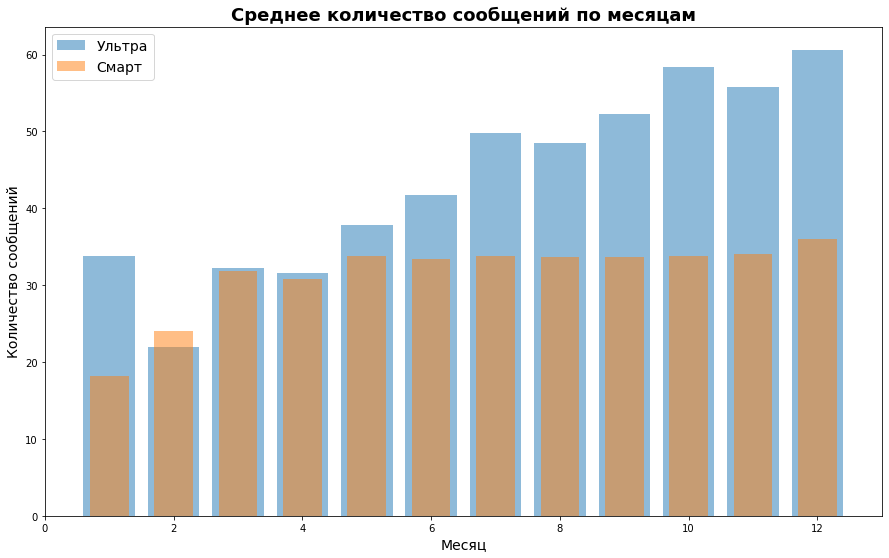

In [27]:
plt.figure(figsize=(15,9))
plt.bar(ultra_plot_messages.index, ultra_plot_messages['count_messages'], alpha = 0.5, label='Ультра', width=0.8)
plt.bar(smart_plot_messages.index, smart_plot_messages['count_messages'], alpha = 0.5, label='Смарт', width=0.6)

plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Месяц', fontsize = 14)
plt.ylabel('Количество сообщений', fontsize = 14)
plt.title('Среднее количество сообщений по месяцам', fontsize = 18, fontweight = 'bold')
plt.xlim(0,13)

#### Вывод

На графике можно наблюдать, что у клиентов тарифа "Смарт" на протяжении 10 месяцев среднее количество в 35 сообщений. А у клиентов тарифа "Ультра" среднее количество сообщений возрастает к концу года, не достигая лимита сообщений.

### Интернет-трафик. Среднее, стандратное отклонение, дисперсия.

Определим средний интернет-трафик, дисперсию и стандартное отклонение для каждого месяца для пользователей тарима "Смарт" и "Ультра".

In [28]:
#подготовим сводные таблицы по количеству cообщений и рассчитаем среднее, стандартное отклонение и дисперсию.
smart_pivot_internet = smart_users.pivot_table(index='month', values='total_mb_used', aggfunc=['mean','std','var'])
ultra_pivot_internet = ultra_users.pivot_table(index='month', values='total_mb_used', aggfunc=['mean','std','var'])

display(smart_pivot_internet.round(decimals=1))
display(ultra_pivot_internet.round(decimals=1))

,mean,std,var
,total_mb_used,total_mb_used,total_mb_used
month,,,
1,8524.4,6451.8,41626212.8
2,11611.4,6254.5,39119349.3
3,15123.9,5835.5,34052595.0
4,13479.5,5705.0,32547357.2
5,15825.2,5985.2,35822355.4
6,15814.8,5798.0,33616415.2
7,15763.5,5904.3,34861096.7
8,16632.2,5600.3,31363517.0


,mean,std,var
,total_mb_used,total_mb_used,total_mb_used
month,,,
1,13153.6,6872.1,47226405.0
2,11787.0,10654.3,113515032.1
3,17552.0,10961.9,120164047.8
4,16843.8,9727.5,94623931.4
5,19381.2,10055.6,101115777.3
6,18942.2,9301.7,86522475.2
7,20514.6,10073.6,101477551.7
8,19594.1,10486.0,109956033.7


В таблицах представлены результаты средний интернет-трафик, стандратноое отклонения и дисперсия по месяцам для клиентов тарифом "Смарт" и "Ультра".
Построим график среднего интернет-трафика по месяцам для 2 тарифов.

In [29]:
smart_plot_internet = smart_users.pivot_table(index='month', values='total_mb_used', aggfunc='mean')
ultra_plot_internet = ultra_users.pivot_table(index='month', values='total_mb_used', aggfunc='mean')

(0, 30000)

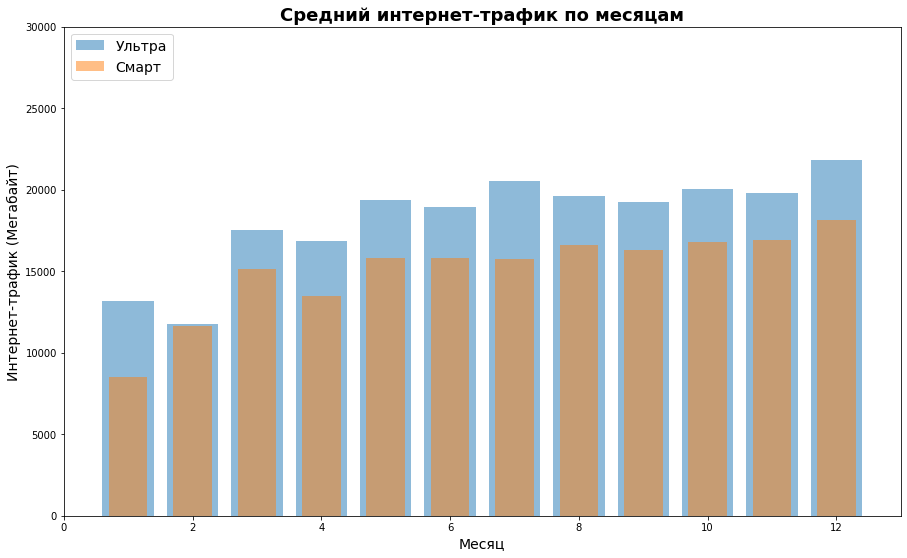

In [30]:
plt.figure(figsize=(15,9))
plt.bar(ultra_plot_internet.index, ultra_plot_internet['total_mb_used'], alpha = 0.5, label='Ультра', width=0.8)
plt.bar(smart_plot_internet.index, smart_plot_internet['total_mb_used'], alpha = 0.5, label='Смарт', width=0.6)

plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Месяц', fontsize = 14)
plt.ylabel('Интернет-трафик (Мегабайт)', fontsize = 14)
plt.title('Средний интернет-трафик по месяцам', fontsize = 18, fontweight = 'bold')
plt.xlim(0,13)
plt.ylim(0,30000)

#### Вывод

На графике наблюдается, что среднее количество интернет-трафика в каждом месяце слегка  увеливается к концу года для пользователей двух тарифов. Однако наблюдается, что пользователи тарифа "Смарт" в среднем превышают бесплатный лимит в 15 Гб. А вот средний расход интернет-трафикапользователи тарифа "Ультра" не превышает.

### Вывод

Провели анализ данных по длительности звонков, количества сообщений и интернет-трафику пользователей. 

У тарифа "Смарт" к концу года возрастает среднее количество минут разговора и со стандартным отклонением в 180 минут пользователям приходится пользоваться дополнительными минутами разговора за доплату.

Количество сообщений в среднем у пользователей тарифа "Смарт" - 33-35 в месяц, с учётом стандартного отклонения может выходить порядока 10-15 сообщений сверх базового количества.

Интернет-трафик возрастает к концу года и среднее значение в некоторые месяцы превышает бесплатное пороговое значение. С учетом стандартного отклонения в 5 Гб пользователям приходится использовать дополнительный трафик каждый месяц.


У тарифа "Ультра" к концу году аналогично возрастает среднее количество минут, но даже со стандартным отклонением они не превышают порог предоставленный тарифом.

Количество сообщение тоже возрастает к концу года, однако очень далеко до лимита.

Интенет-трафик возрастает к концу года, и со стандартным отклонением в 10 Гб инога возникает необходимость в дополнительном интернет-трафике.

## Проверка гипотез

### Проверка гипотезы. Средняя выручка тарифов "Ультра" и "Смарт" различается.

Проверим гипотезу различия средней выручки тарифов "Ультра" и "Смарт".

Выдвигаем нулевую гипотезу, что среднее значение выручки для пользователей тарифов "Ультра" и "Смарт" равны. Тогда в случае отвержения нулевое гипотезы - среднии выручки будут различаться.

In [31]:
#оценим дисперсию выручки для наших тарифов
display(np.var(smart_users['revenue']))
display(np.var(ultra_users['revenue']))

672225.6805830307

143345.5641732588

In [32]:
from scipy import stats as st

smart_revenue = smart_users['revenue']
ultra_revenue = ultra_users['revenue']

alpha = 0.05 # критический уровень статистической значимости, если p-value окажется меньше него - отвергаем гипотезу

results = st.ttest_ind(smart_revenue, ultra_revenue, equal_var = False)

# так как дисперсия для выручки у выборок тарифов отличается, то equal_var = False

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1591163472579867e-246
Отвергаем нулевую гипотезу


Нулевая гипотеза равенства средних двух выборок была отвергнута. Соотвественно средняя выручка тарифов "Смарт" и "Ультра" различаются. 1.6 * 10 в -298 степени, это очень очень маленький процент.

Посмотрим на среднюю выручку для двух тарифов. И проверим отвержение нашей гипотезы.

In [33]:
print('Cредняя выручка тарифа "Смарт":', smart_users['revenue'].mean().round(decimals=2))
print('Cредняя выручка тарифа "Ультра":', ultra_users['revenue'].mean().round(decimals=2))

Cредняя выручка тарифа "Смарт": 1294.48
Cредняя выручка тарифа "Ультра": 2071.07


#### Вывод

Среднии выручки тарифов для датафрейма различаются практически в два раза. И исходя из анализа использования минут разговора, сообщений, и интернет-трафика наблюдается различие в использования у пользователей разных тарифов: Пользователи тарифа "Ультра" меньше выходят за границы предоставленных минут и сообщений, и среднее по интернет-трафику у них составляет порядка 2/3 от порогового значения, что не скажешь про клиентов тарифа "Смарт".

### Проверка гипотезы. Средняя выручка Москвы отличается от  выручки пользователей других регионов.

Проверим гипотезу различия средней выручки между Москвой и другими регионами.

Выдвигаем нулевую гипотезу, что среднее значение выручки для пользователей Москвы и других регионов равны. Тогда в случае отвержения нулевое гипотезы - среднии выручки будут различаться.

In [34]:
# создадим таблицу с городом и id_user
df_city = df_users[['user_id', 'city']]

#добавим города для каждого пользователя в общую таблицу
users_total = user_total.merge(df_city, on='user_id', how='left')

#cоздадим два датасета для пользователей из Москвы, и для пользователей других регионов.
moscow_users = users_total.query('city == "Москва"')
not_moscow_users = users_total.query('city != "Москва"')

#оценим дисперсию выручки
display(np.var(moscow_users['revenue']))
display(np.var(not_moscow_users['revenue']))

565256.3794161058

655376.1600665703

In [35]:
moscow_users_revenue = moscow_users['revenue']
not_moscow_users_revenue = not_moscow_users['revenue']

alpha = 0.05 # критический уровень статистической значимости, если p-value окажется меньше него - отвергаем гипотезу

results = st.ttest_ind(moscow_users_revenue, not_moscow_users_revenue, equal_var = False)

# так как дисперсия для выручки у выборок тарифов отличается, то equal_var = False

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5100330321053422
Не получилось отвергнуть нулевую гипотезу


45%, большая вероятность совпадения выручки в Москве и в других регионах. Взглянем на среднии значения выручки для датафрейма.

In [36]:
print('Cредняя выручка пользователей в Москве:', moscow_users_revenue.mean().round(decimals=2))
print('Cредняя выручка пользователей не в Москве:', not_moscow_users_revenue.mean().round(decimals=2))

Cредняя выручка пользователей в Москве: 1550.81
Cредняя выручка пользователей не в Москве: 1528.18


In [37]:
#посмотрим количество клиентов в Москве и в других регионах.

moscow_users_count = df_users['user_id'][df_users['city'] == 'Москва'].count()
not_moscow_users_count = df_users['user_id'][df_users['city'] != 'Москва'].count()

print('Количество пользователей в Москве:', moscow_users_count)
print('Количество пользователей не в Москве:', not_moscow_users_count)

Количество пользователей в Москве: 99
Количество пользователей не в Москве: 401


#### Вывод

Нулеваую гипотезу о совпадение выручки клиентов из Москвы и из других регионов не удалось отвергнуть. Взглянув на среднее значения по выручке в Москве и регионах - значения очень близки, что подкрепляет нулевую гипотезу.

Пользователей в Москве в 4 раза меньше чем в других регионах, которая судя по  подтверждению нулевой гипотезы является аналогией выборки людей из других населенных пунктов с меньшим количеством людей.

## Общий вывод

Было получено неслолько датафреймов о пользователях "Мегалайн". Выполнена сборка всех необходимым параметров в один датарфейм, количество минут разговора, сообщений и интернет трафик.

Расчитана ежемесячная выручка для каждого пользователя и добавлена в основную табилцу.

Проведен анализ данных о среднем количестве минут разговора, сообщениях и интернет-трафике для пользователей для двух тарифов. Пользователи тарифа "Смарт" часто используют весь доступный лимит тарифа и используют дополнительные минуты, интернет-трафик и сообщения за доп. плату. Пользоваетли тарифа "Ультра" наоборот реже тратят весь доступный лимит и укладываются в рамки тарифа.

Проверено две гипотезы:
1. Нулевая гипотеза о равенстве средней выручки клиентов для двух тарифов. Гипотеза была отвергнута соотвественно средняя выручк не равна.
2. Нулевая гипотеза о равенстве средней выручки клиентов Москвы и других населенных пунктов. Не удалост отвергнуть нулевую гипотезу с вероятьность 45% наблюдается средней выручки.

Для понимания какой из тарифов приносит больше денег ниже построены графики средней выручки и суммарной выручки клиентов за 2018 год.

(0, 2500)

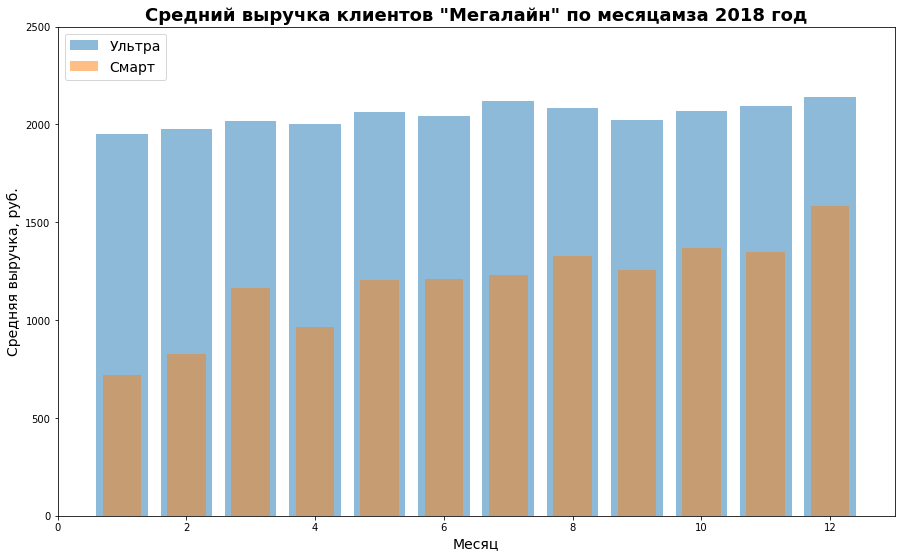

In [38]:
smart_plot_revenue = smart_users.pivot_table(index='month', values='revenue', aggfunc='mean')
ultra_plot_revenue = ultra_users.pivot_table(index='month', values='revenue', aggfunc='mean')

plt.figure(figsize=(15,9))
plt.bar(ultra_plot_revenue.index, ultra_plot_revenue['revenue'], alpha = 0.5, label='Ультра', width=0.8)
plt.bar(smart_plot_revenue.index, smart_plot_revenue['revenue'], alpha = 0.5, label='Смарт', width=0.6)

plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Месяц', fontsize = 14)
plt.ylabel('Средняя выручка, руб.', fontsize = 14)
plt.title('Средний выручка клиентов "Мегалайн" по месяцамза 2018 год', fontsize = 18, fontweight = 'bold')
plt.xlim(0,13)
plt.ylim(0,2500)

(0, 13)

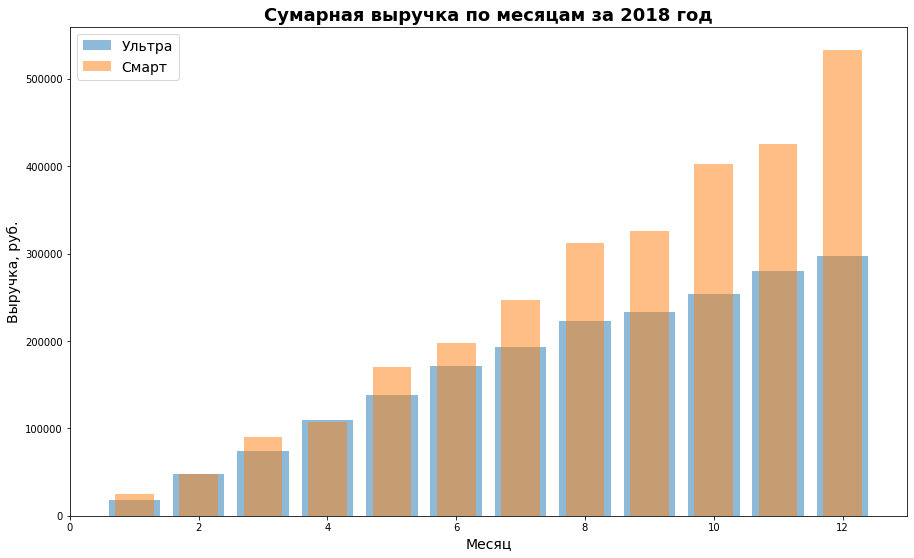

In [39]:
smart_plot_revenue_sum = smart_users.pivot_table(index='month', values='revenue', aggfunc='sum')
ultra_plot_revenue_sum = ultra_users.pivot_table(index='month', values='revenue', aggfunc='sum')

plt.figure(figsize=(15,9))
plt.bar(ultra_plot_revenue_sum.index, ultra_plot_revenue_sum['revenue'], alpha = 0.5, label='Ультра', width=0.8)
plt.bar(smart_plot_revenue_sum.index, smart_plot_revenue_sum['revenue'], alpha = 0.5, label='Смарт', width=0.6)

plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Месяц', fontsize = 14)
plt.ylabel('Выручка, руб.', fontsize = 14)
plt.title('Cумарная выручка по месяцам за 2018 год', fontsize = 18, fontweight = 'bold')
plt.xlim(0,13)

На графике средней выручки видно, что средняя выручка у тарифа "Ультра" больше и является стандратной оплатой за месяц, а средняя выручка у тарифа "Смарт" растет к концу года, и превышает стандартную оплату за месяц.

На графике суммарной выручки наблюдается рост выручки у двух тарифов. Выручка тарифа "Смарт" начиная с 5 месяца начинает расти быстрее выручки 